In [1]:
import os
os.chdir("/home/comsee/Internship_Antony/neuvisys/neuvisys-analysis")

In [2]:
%load_ext autoreload
%autoreload 2

import os
import shutil
import pprint
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pdf2image import convert_from_path
from src.spiking_network.network.neuvisys import SpikingNetwork
from src.spiking_network.analysis.network_display import (
    display_network,
    load_array_param,
    complex_cells_directions,
    complex_cell_disparities,
)
from src.spiking_network.analysis.network_statistics import (
    rf_matching,
    direction_norm_length,
    orientation_norm_length,
    direction_selectivity,
    orientation_selectivity,
    update_dataframe,
    disparity_histogram,
    inhibition_weight_against_orientation,
    inhibition_weight_against_disparity,
    visualize_potentials,
    amount_of_excitation_inhibition, 
    visualize_inhibition_weights,
    visualize_td_inhibition,
    visualize_histogram_of_potentials,
    visualize_sum_inhibition_weights,
    visualize_evolution_of_inhibition,
    visualize_td_sum_inhibition,
    visualize_total_inhibition_evolution,
    visualize_inhibition_timing,
    visualize_total_tdinhibition_evolution, 
    suppression_metric,
    average_over_orientations,
    averaged_graph,
    orientations_graph,
    calculate_similitude_tuning, 
    average_orientations_numbers_cells,
    calculate_similitude_preferred_orientation,
    count_orientations_per_thickness,
    direction_invariance
    
)
from src.spiking_network.analysis.spike_train import (
    spike_trains,
    raster_plot,
    event_plot,
    time_histogram,
    spike_rate_histogram,
    isi_histogram,
    instantaneous_rates,
    correlation_coeficient_matrix,
    time_histogram_comparison,
)
from src.spiking_network.gabor.gabbor_fitting import (
    create_gabor_basis,
    hists_preferred_orientations,
    plot_preferred_orientations,
)
from src.spiking_network.analysis.parameter_analysis import (
    correlation_matrix,
    scatter_mat,
)

os.chdir("/home/comsee/Internship_Antony/neuvisys/neuvisys-analysis/src")
home = "/home/comsee/"

SMALL_SIZE = 20
MEDIUM_SIZE = 25
BIGGER_SIZE = 30

plt.rc('figure', figsize=(30, 8))
plt.rc('font', size=SMALL_SIZE)  # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE,
       labelsize=MEDIUM_SIZE)  # fontsize of the axes title, fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)  # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)  # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)  # legend fontsize

In [36]:
networks_path = "/home/comsee/Internship_Antony/neuvisys/neuvisys-analysis/configuration"
#path = networks_path + "/other_dataset_training/lateral_topdown/shared/rotated/new_rot/new_dataset/rotated_grey_inhib2/"
path = networks_path + "/other_dataset_training/lateral_topdown/shared/vertical/"
#path = networks_path + "/other_dataset_training/lateral_topdown/shared/rotated/new_rot/new_dataset/rotated_grey_RFslow_syn/"
spinet = SpikingNetwork(path)

Simple cells weights


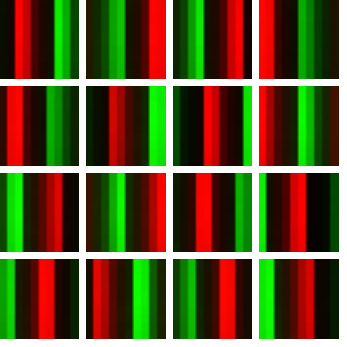

Complex cells weights (average over all simple cells)


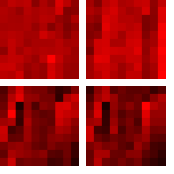

In [37]:
display_network([spinet])

print("Simple cells weights")
if spinet.conf["nbCameras"] == 2:
    display(convert_from_path(path + "figures/0/weight_sharing_combined.pdf")[0])
else:
    display(convert_from_path(path + "figures/0/weight_sharing_0.pdf")[0])

print("Complex cells weights (average over all simple cells)")
for i in range(spinet.l_shape[1, 2]):
    display(convert_from_path(path + "figures/1/complex_weights_depth_" + str(i) + ".pdf")[0])
    break

In [19]:
spinet.load_orientations()

In [20]:
simple_count, complex_count=count_orientations_per_thickness(spinet)

In [21]:
simple_count

array([11.,  9., 11.,  5.,  2., 10.,  8.,  8.])

In [22]:
complex_count

array([ 66., 137., 143., 126.,  56., 183., 154., 138.])

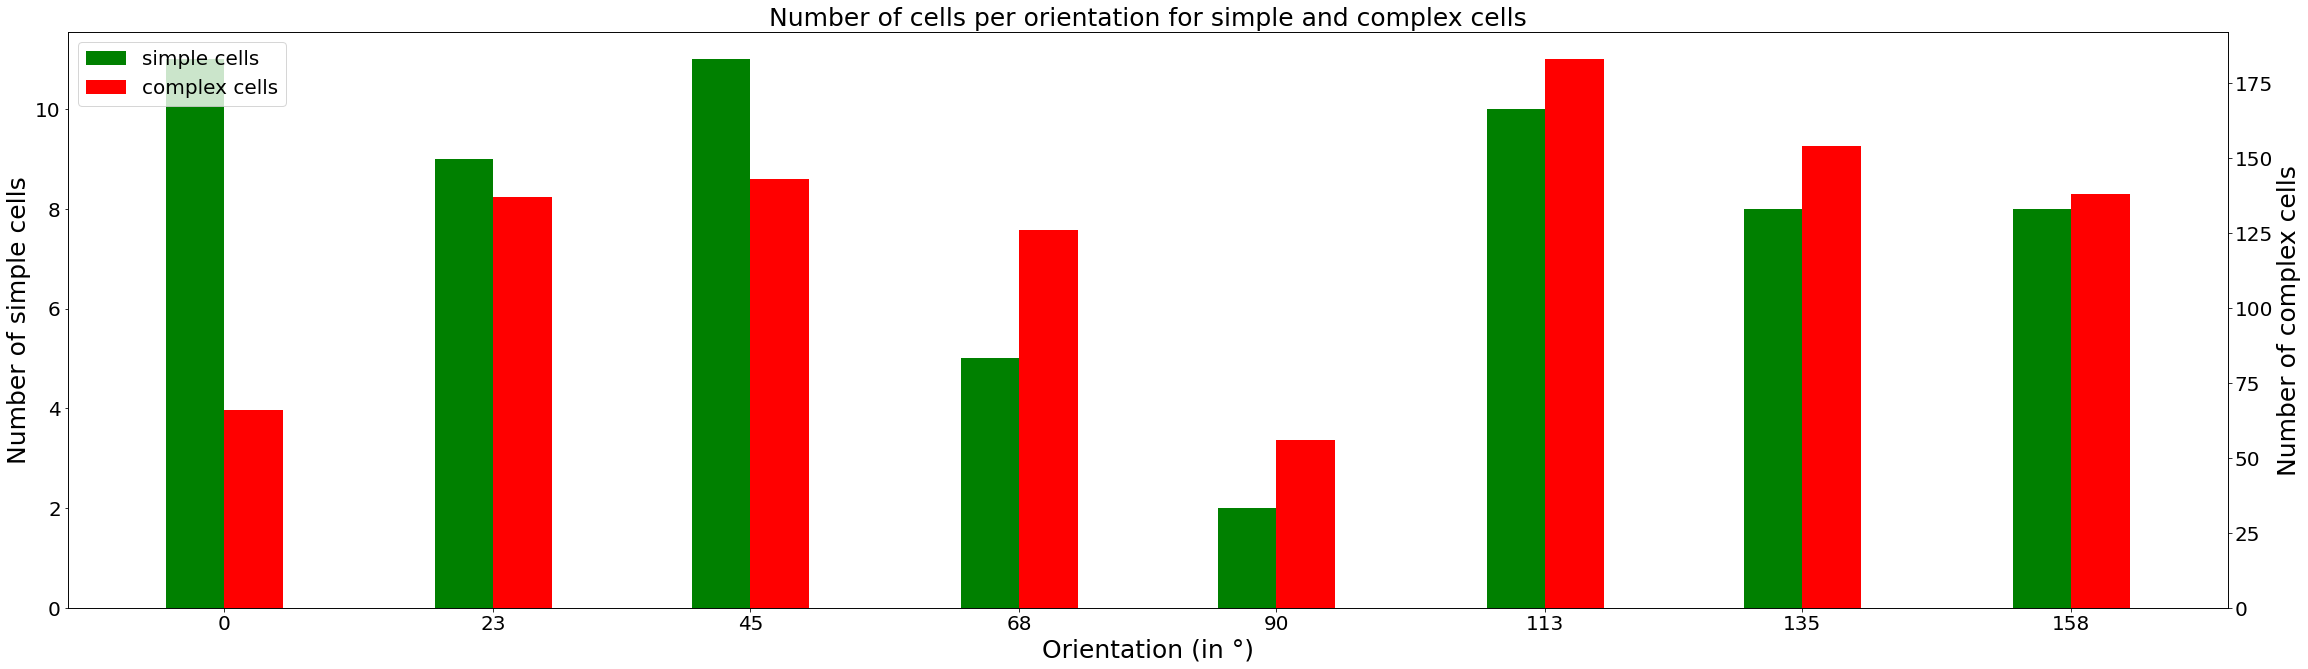

In [23]:
width = 5
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
angles = np.array([0, 23, 45, 68, 90, 113, 135, 158])
ax.bar(angles-width/2, simple_count, width, color='g', label='simple cells')
ax.set_xlabel("Orientation (in °)")
ax.set_ylabel('Number of simple cells')

p_ = ax.twinx()

p_.bar(angles+width/2, complex_count, width, color='r', label= 'complex cells')
p_.set_xlabel("Orientation (in °)")
p_.set_ylabel('Number of complex cells')
#p_.set_title('Average number of cells per orientation for complex cells')

plt.title('Number of cells per orientation for simple and complex cells')
plt.xticks(angles)
fig.legend(loc='upper left', bbox_to_anchor=(0, 0, 0.2, 1))
plt.show()

In [133]:
direction_simple, direction_complex = direction_invariance(spinet)

In [138]:
np.mean(direction_simple, axis=0)

0.6503348214285715

In [139]:
np.mean(direction_complex, axis=0)

0.6097842261904762